# Intelligent Agents: Vacuum-cleaner World

Implement a simulator environment for a vacuum-cleaner world and a set of intelligent agents.

## PEAS description

__Performance Measure:__ Each action costs 1. The performance is measured as the sum of the cost to clean the whole environment.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size of the layout of the room (i.e., it knows n and where it starts).

__Actuators:__ The agent can `clean` the current square or move to an adjacent square by going `north`, `east`, `west`, or `south`.

__Sensors:__ Four bumper sensors, one for `north`, `east`, `west`, and `south`; a dirt sensor reporting dirt in the current square.  

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop untill all squares are clean or a predefined number of steps have been reached.

## Define the agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictonary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`; not specified bumpers are assumed to be `False`. E.g., if the agent is on the north-west corner, `bumpers` gets `{"north" : True, "west" : True}` or if the agent is not close to a border then it gets `{}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [280]:
from numpy import random

actions = ["north", "east", "west", "south", "suck"]


def simple_randomized_agent(bumpers, dirty):
    return random.choice(actions)

In [281]:
simple_randomized_agent({"north" : True}, True)

'north'

## Simple environment example

The environment is infinite in size (bumpers are always `False`) and every square is dirty. We run the agent for 10 times steps.

In [282]:
for i in range(10):
    print(simple_randomized_agent({"north" : False, "south" : False, "west" : False, "east" : False}, True))

suck
suck
south
suck
west
suck
suck
east
north
suck


# Tasks

_Submission Instructions:_ Use this notebook to prepare your submission. Complete this section with your code and results. You can use Markdown blocks for your description, comments in the code and use mathplotlib to produce charts. If you use external code files then you can include them with 

```
from notebook import psource
psource("your_file.py")
```

_Note:_ Try to keep the code simple! In this couse, we want to learn about the algorithms and we often do not need to use object-oriented design. 


## Task 1: Implement a simulation environment

Your environment simulator needs to create squares, make some dirty, and proivde the agent function with the sensor inputs. The environment needs to evaluate the performance measure. It needs to track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The simulation environment needs to work with the simple randomized agent program from above.

In [290]:
import numpy as np
import random
import matplotlib.pyplot as plt
    
MAX = 500000
N = 100
    
def environment(agent, n=SIZE, p=.2, max=MAX, verbose=True):
    # n X n grid with probability p of dirty squares
    floor = np.random.choice(a=[True, False], size=(SIZE,SIZE), p=[p, 1-p])
    # count amount of dirty squares
    remaining = np.sum(floor)
    if (verbose):
        print("Board:\n", floor)
        print("Squares to clean:", remaining)
    
    global loc
    loc = [0, 0]

    steps = 0
    if remaining != 0:
        for i in range(max): 
            
            # return True if any walls are adjacent
            bumpers = {
                "north" : loc[1] == 0,
                "east" : loc[0] == n-1,
                "south" : loc[1] == n-1,
                "west" : loc[0] == 0
            }

            dirty = floor[loc[1], loc[0]]

            if verbose:
                print('steps:', i)
                print('loc:', loc)
                print('dirty:', dirty)
                print('bumpers:', bumpers)
            steps = i

            action = agent(bumpers, dirty)
            if verbose: print("action:", action, '\n')

            if (action == "north" and loc[1] > 0): loc[1] = loc[1] - 1
            elif (action == "south" and loc[1] < (n-1)): loc[1] = loc[1] + 1
            elif (action == "east" and loc[0] < (n-1)): loc[0] = loc[0] + 1
            elif (action == "west" and loc[0] > 0): loc[0] = loc[0] - 1
            elif (action == "suck" and dirty): 
                floor[loc[1], loc[0]] = False
                remaining = remaining - 1
                if verbose: print("Squares left:", remaining)
                if remaining == 0: break 
    return steps
    


## Task 2:  Implement a simple reflex agent

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking.

In [291]:
def simple_reflex_agent(bumpers, dirty):
    # default option as cleaning a square is first priority
    if (dirty): return 'suck'
    else: 
        # if bumpers[key] == True exclude from options list
        options = [i for i in bumpers.keys() if bumpers[i] is False]
        # randomly select option from remaining list
        choice = random.choice(options)
        return choice

## Task 3: Implement a model-based reflex agent 

This agent keeps track of the location and remembers where it has cleaned. Assume the agent knows how many squares the room has and where it starts. It can now use more advanced navigation.

How will your agent perform if it is put into a larger room, if the room contains obstacles, or it starts in a random square?

In [371]:
# since the agent knows the floor it can navigate all squares easily
# no object detection and avoidance built in 
def model_based_agent(bumpers, dirty):
    visited[loc[1], loc[0]] = 1
#     print(visited)
    # simple reflex to return suck if dirty
    if dirty: return 'suck'
    else:
        options = [i for i in bumpers.keys() if bumpers[i] is False]
#         print("Options", options)
        open = []
        for dir in options:
            if dir == "north":
                if not visited[loc[1]-1,loc[0]]:
                    open.append("north")
            elif dir == "south":
                if not visited[loc[1]+1,loc[0]]:
                    open.append("south")
            elif dir == "east":
                if not visited[loc[1], loc[0]+1]:
                    open.append("east")
            elif dir == "west":
                if not visited[loc[1], loc[0]-1]:
                    open.append("west")
        if not open:
            randomChoice = random.choice(options)
            return randomChoice
        else:
            nonvisitedRandom = random.choice(open)
            return nonvisitedRandom


In [344]:
# This agent will always touch each square only once with exception to the squares that are dirty because it requires more than just one action.
# If the room expands, it does not affect the performance of the agent as it is linear based on the amount of squares that exist.
# Obstacles would absoultely wreck this agent. A single obstacle would keep it from cleaning all subsequent spaces.
# If it starts in a random space, it can navigate back to (0,0) by going North until its bumper says true then navigating West to the NW corner.
# If I were to have built in a obstacle avoidance, I would have at some location when the robot bumps into an obstacle, 
# have it use its percepts to detec what directions it is bounded by and attempt to map it on the visited field. Then avoid it by going 90 deg
# to the right or left of it and drive along it until the barrier no longer exists. This way you can see the barriers and in the future avoid it by going around it essentially. 
# I would use a recursive function that keeps driving a space until the barrier does not exist. If it is still in the percepts, call the function again to drive away from it.

## Task 4: Simulation study

Compare the performance of the agents using different size environments. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use at least 100 random runs for each.

In [403]:
models = [simple_randomized_agent, simple_reflex_agent, model_based_agent]
dimList = [5, 10, 25, 50]

def chart_iterations(agentFunc=models, sizes=dimList):
    modelMeans = []
    for agentFunc in models:
        print("Performance Histograms for {}".format(str(agentFunc.__name__)))
        agentMeans = []
        plotSizes = []
        for size in sizes:
            global SIZE
            SIZE = size
            plotSizes.append(SIZE**2)
            print("Size of grid:", size, "X", size)
            steps = np.repeat(0,N)
            for i in range(N):
                global visited
                visited = np.random.choice(a=[0, 1], size=(SIZE,SIZE), p=[1, 0])
                steps[i] = environment(agentFunc, n=SIZE, verbose=False)
            
            agentMeans.append(np.mean(steps))
            print("Mean:", np.mean(steps))
            print("Std Dev:", np.std(steps))
            plt.title(label=(str(agentFunc.__name__+ " " + str(SIZE) + " X " + str(SIZE))))
            plt.hist(steps, bins=15)
            plt.xlabel("steps")
            plt.ylabel("frequency")
            plt.show()
        # show chart of means for each agent and plot a regression 
        plt.scatter(plotSizes, agentMeans, c='r', label='data')
        plt.xlabel('Squares in Grid')
        plt.ylabel('Mean steps to finish')
        plt.title(str(agentFunc.__name__) + " regression")
        m, b = np.polyfit(plotSizes, agentMeans, 1)
        regression_line = [(m*x)+b for x in plotSizes]
        plt.plot(plotSizes, agentMeans, 'o')
        plt.plot(plotSizes, regression_line, label='regression line')
        plt.show()
        
        # collect all sets of means
        modelMeans.append(agentMeans)
    # plot comparisons of each agent in each environment
    print(modelMeans)
    tModelMeans = np.array(modelMeans).T
    print(tModelMeans)
    for meansBySize, sizeGrid in zip(tModelMeans, dimList):
        plt.bar([1,2,3], meansBySize, tick_label=[model.__name__ for model in models], width=.8)
        plt.ylabel("Average Steps")
        plt.xlabel("Agent Function")
        plt.title("Size "+str(sizeGrid)+' X '+str(sizeGrid))
        plt.show()
        
        


Performance Histograms for simple_randomized_agent
Size of grid: 5 X 5
Mean: 376.94
Std Dev: 183.82349251387865


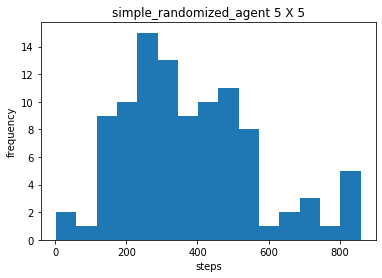

Size of grid: 10 X 10
Mean: 3113.12
Std Dev: 1177.4617299938031


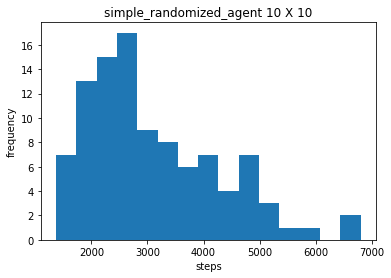

Size of grid: 25 X 25
Mean: 30627.69
Std Dev: 8948.535773739746


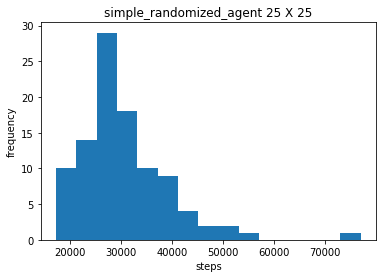

Size of grid: 50 X 50
Mean: 163850.45
Std Dev: 39877.95691215261


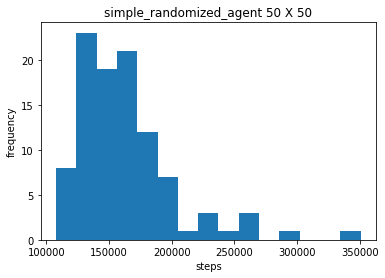

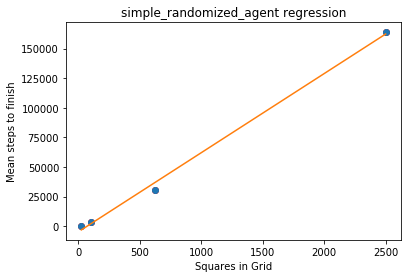

Performance Histograms for simple_reflex_agent
Size of grid: 5 X 5
Mean: 101.54
Std Dev: 67.20750255737822


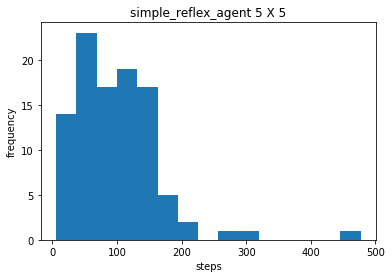

Size of grid: 10 X 10
Mean: 899.54
Std Dev: 425.8574038337246


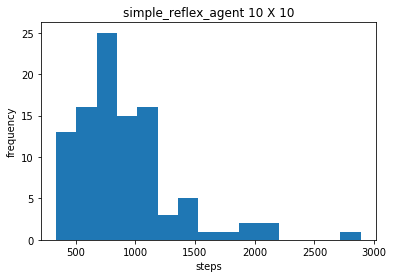

Size of grid: 25 X 25
Mean: 11101.1
Std Dev: 4152.320509064781


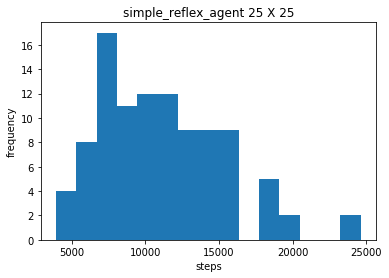

Size of grid: 50 X 50
Mean: 64137.35
Std Dev: 17235.39216111719


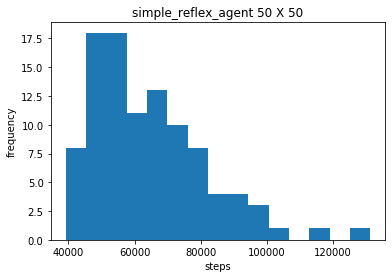

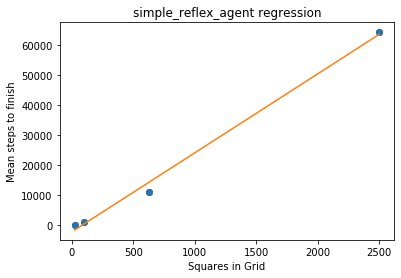

Performance Histograms for model_based_agent
Size of grid: 5 X 5
Mean: 31.73
Std Dev: 16.008032358787887


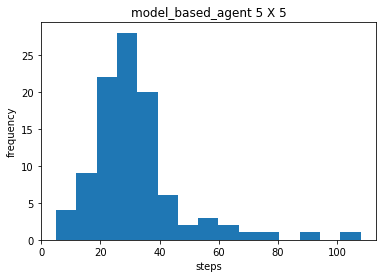

Size of grid: 10 X 10
Mean: 301.38
Std Dev: 185.3591529976332


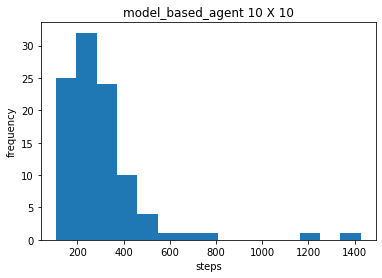

Size of grid: 25 X 25
Mean: 4307.41
Std Dev: 1789.0371829282924


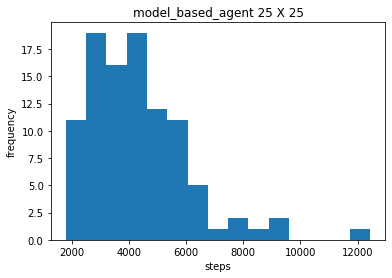

Size of grid: 50 X 50
Mean: 27201.52
Std Dev: 10518.433468421044


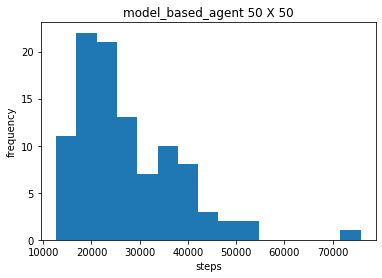

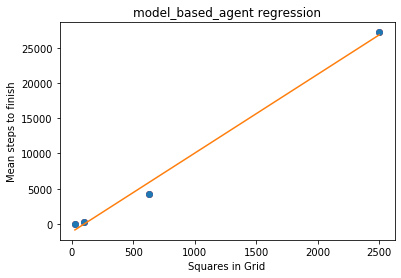

[[376.94, 3113.12, 30627.69, 163850.45], [101.54, 899.54, 11101.1, 64137.35], [31.73, 301.38, 4307.41, 27201.52]]
[[3.7694000e+02 1.0154000e+02 3.1730000e+01]
 [3.1131200e+03 8.9954000e+02 3.0138000e+02]
 [3.0627690e+04 1.1101100e+04 4.3074100e+03]
 [1.6385045e+05 6.4137350e+04 2.7201520e+04]]


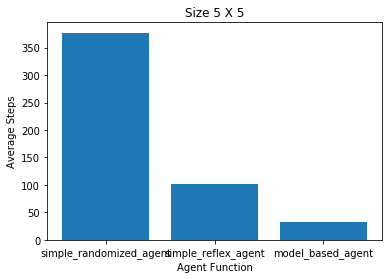

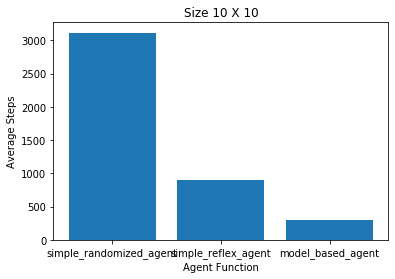

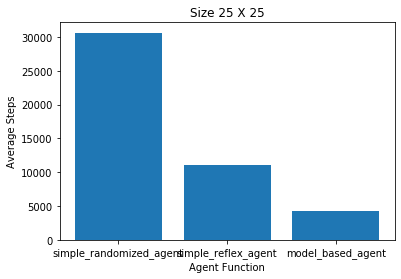

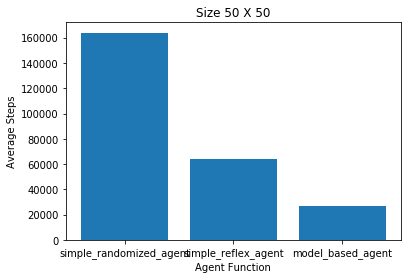

In [404]:
chart_iterations()

## Bonus tasks

* __Obstacles:__ Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. How does this change the performance?
* __Unknown environment with obstacles:__ The agent does not know how large the environment is, where it starts or where the obstacles are.
* __Utility-based agent:__ Change the environment, so each square has a fixed probability of getting dirty again. Give this information to the agent (as a 2-dimensional array of probabilities). Cleaning one dirty square produces the utility of 1. Implement a utility-based agent that maximizes the expected utility over a time horizon of 10000 time steps. This is very tricky!

In [289]:
# Your code goes here